___
___
___
# EDA
___
___
___

In [179]:
import pandas as pd 

df = pd.read_csv('data_set/SBAnational-EDA.csv')
df.head(3)

,Unnamed: 0,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,...,N,Y,2010-03-13,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1,NEW PARIS,IN,46526,1ST SOURCE BANK,OH,722410,1997-02-28,1997-01-01,60,...,N,Y,2010-03-13,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,2,BLOOMINGTON,MN,47401,WELLS FARGO BANK NATL ASSOC,IL,621210,1997-02-28,1997-01-01,180,...,N,N,2010-03-13,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0


In [180]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.drop(columns='ChgOffDate',inplace=True)
df.drop(columns='DisbursementDate',inplace=True)
df.drop(columns='DisbursementGross',inplace=True)
df.drop(columns='BalanceGross',inplace=True)
df.drop(columns='ChgOffPrinGr',inplace=True)

df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

### Séparation en liste numériques et catégorielles

In [181]:
colonnes_numeriques = df.select_dtypes(include='number').columns.tolist()
colonnes_categorielles = df.select_dtypes(include ='object').columns.tolist()

print(colonnes_categorielles)
print(colonnes_numeriques)

variables_cat = ['State','Bank','RevLineCr','LowDoc']
variables_num = ['Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'GrAppv', 'SBA_Appv']



['City', 'State', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'RevLineCr', 'LowDoc', 'MIS_Status']
['Zip', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'GrAppv', 'SBA_Appv']


### NoEmp: Catégorisation des entreprises

In [182]:
# Convertir une colonne de chaînes de caractères en entiers
df['NoEmp'] = df['NoEmp'].astype(int)


In [183]:
# TPE,PME,ETI


# Fonction pour catégoriser les entreprises
def categoriser_entreprise(nombre_employes):

    if nombre_employes == 0:
        return 'NA'
    if nombre_employes > 0 and nombre_employes <= 19:
        return 'TPE'
    elif nombre_employes >= 20 and nombre_employes <= 249:
        return 'PME'
    elif nombre_employes >= 250 and nombre_employes <= 5000:
        return 'ETI'
    else:
        return 'GE'  

# Appliquer la fonction à la colonne 'nombre_employes' pour créer une nouvelle colonne de catégorie
df['NoEmp'] = df['NoEmp'].apply(categoriser_entreprise)

filtre = df['NoEmp']=='GE'


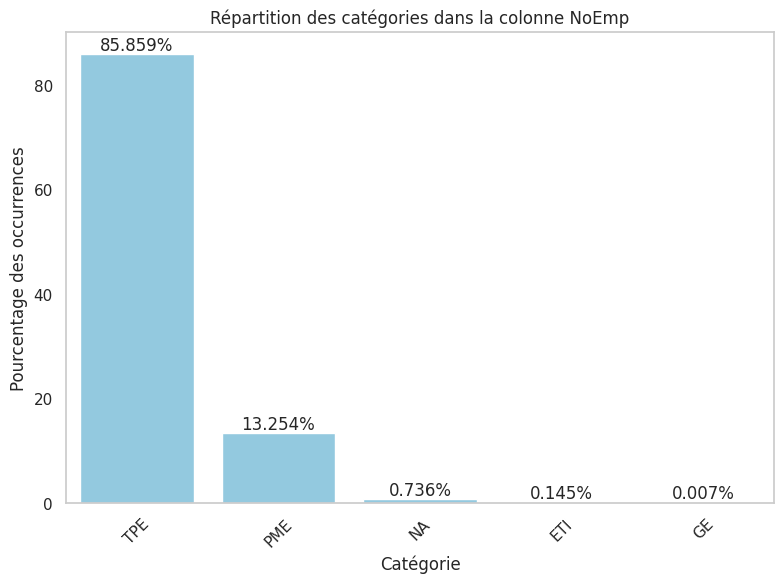

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter le nombre total d'entrées
total_entries = len(df)

# Compter le nombre d'occurrences de chaque catégorie
repartition_categories = df['NoEmp'].value_counts()


# Calculer les pourcentages
pourcentages = (repartition_categories / total_entries) * 100

# Créer le bar plot avec Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=pourcentages.index, y=pourcentages.values, color='skyblue')
plt.title('Répartition des catégories dans la colonne NoEmp')
plt.xlabel('Catégorie')
plt.ylabel('Pourcentage des occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(axis='y')  # Affichage de la grille sur l'axe des y
plt.tight_layout()

# Afficher les pourcentages sur l'axe des ordonnées
for i, pourcentage in enumerate(pourcentages):
    plt.text(i, pourcentage, f'{pourcentage:.3f}%', ha='center', va='bottom')

plt.show()


### NewExist

In [185]:
filtre = df['NewExist']== 0.0
df.drop(df[filtre].index,inplace=True)


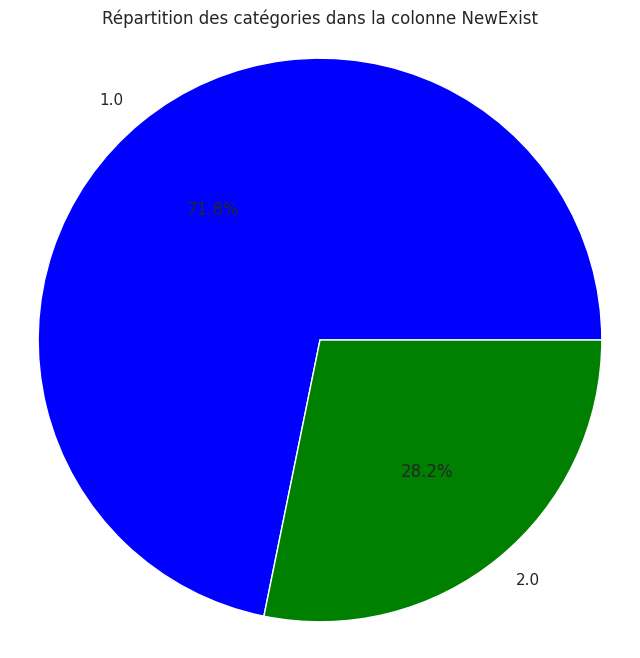

In [186]:
pourcentages = df['NewExist'].value_counts(normalize=True)*100

plt.figure(figsize=(8,8))
plt.pie(x=pourcentages, labels=pourcentages.index, colors=['blue', 'green'], autopct='%1.1f%%',wedgeprops=None)
plt.title('Répartition des catégories dans la colonne NewExist')
plt.axis('equal')  # Pour avoir un cercle parfait
plt.show()

### UrbanRural

In [187]:
df['UrbanRural'].value_counts()

UrbanRural
1    467181
0    321951
2    104652
Name: count, dtype: int64

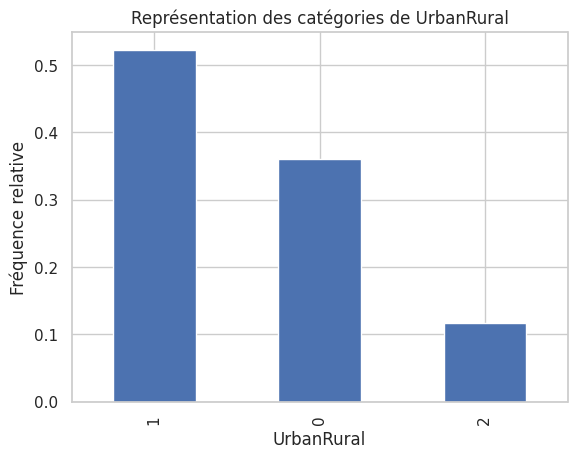

In [188]:
df['UrbanRural'].value_counts(normalize=True).plot(kind='bar', width=0.5)
plt.xticks(rotation=90)
plt.title('Représentation des catégories de UrbanRural')
plt.ylabel('Fréquence relative')
plt.show()

### GrAppv

In [189]:
df['GrAppv'].describe()

count    8.937840e+05
mean     1.931110e+05
std      2.833839e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

In [190]:
# Fonction pour catégoriser les entreprises
def categoriser_GrAppv(montant):

    if montant >= 0 and montant <= 34999:
        return '< 35 000'
    elif montant >= 35000 and montant <= 89999:
        return '< 90 000'
    elif montant >= 90000 and montant <= 224999:
        return '< 225 000'
    else:
        return '> 225 000'  

# Appliquer la fonction à la colonne 'nombre_employes' pour créer une nouvelle colonne de catégorie
df['GrAppv'] = df['GrAppv'].apply(categoriser_GrAppv)

In [191]:
df

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,TPE,2.0,0,0,1,0,N,Y,P I F,< 90 000,48000.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,OH,722410,1997-02-28,1997-01-01,60,TPE,2.0,0,0,1,0,N,Y,P I F,< 90 000,32000.0
2,BLOOMINGTON,MN,47401,WELLS FARGO BANK NATL ASSOC,IL,621210,1997-02-28,1997-01-01,180,TPE,1.0,0,0,1,0,N,N,P I F,> 225 000,215250.0
3,BROKEN ARROW,OK,74012,BANK OF AMERICA NATL ASSOC,OK,0,1997-02-28,1997-01-01,60,TPE,1.0,0,0,1,0,N,Y,P I F,< 90 000,28000.0
4,ORLANDO,FL,32801,BANK OF AMERICA NATL ASSOC,FL,0,1997-02-28,1997-01-01,240,TPE,1.0,7,7,1,0,N,N,P I F,> 225 000,229000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894806,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,OH,451120,1997-02-27,1997-01-01,60,TPE,1.0,0,0,1,0,-,N,P I F,< 90 000,56000.0
894807,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,OH,451130,1997-02-27,1997-01-01,60,TPE,1.0,0,0,1,0,Y,N,P I F,< 90 000,42500.0
894808,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997-01-01,108,PME,1.0,0,0,1,0,N,N,P I F,> 225 000,225000.0
894809,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997-01-01,60,TPE,1.0,0,0,1,0,N,Y,CHGOFF,< 90 000,60000.0


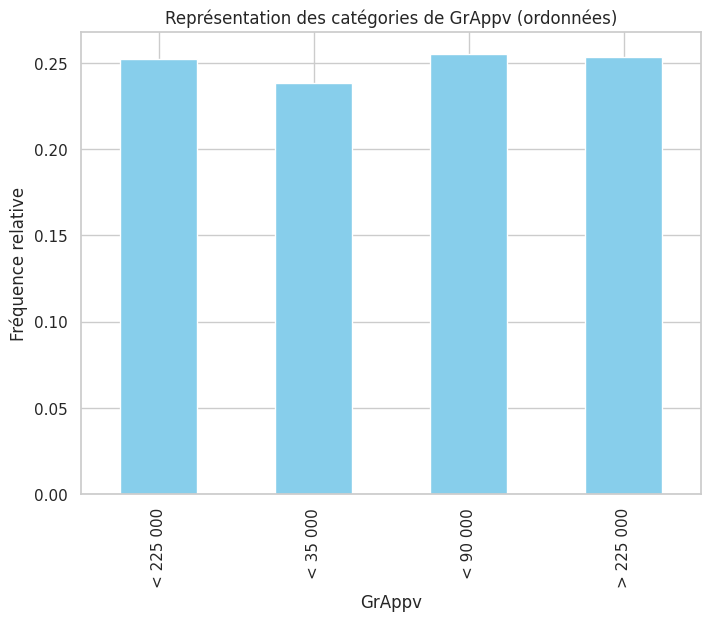

In [192]:
# Calculer les valeurs normalisées
valeurs_normalisees = df['GrAppv'].value_counts(normalize=True)

# Trier les valeurs et les index par ordre croissant
valeurs_normalisees = valeurs_normalisees.sort_index()

# Créer le bar plot avec les valeurs triées
plt.figure(figsize=(8, 6))
valeurs_normalisees.plot(kind='bar', width=0.5, color='skyblue')
plt.title('Représentation des catégories de GrAppv (ordonnées)')
plt.ylabel('Fréquence relative')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()


### SBA_Appv

In [193]:
df['SBA_Appv'].describe()

count    8.937840e+05
mean     1.498219e+05
std      2.284824e+05
min      5.000000e+02
25%      2.125000e+04
50%      6.235300e+04
75%      1.750000e+05
max      5.472000e+06
Name: SBA_Appv, dtype: float64

### Analyse des variables qualitatives: RevLineCr,LowDoc,Bank,State

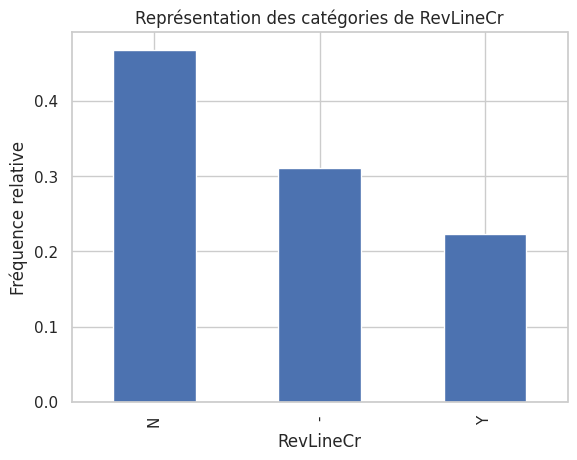

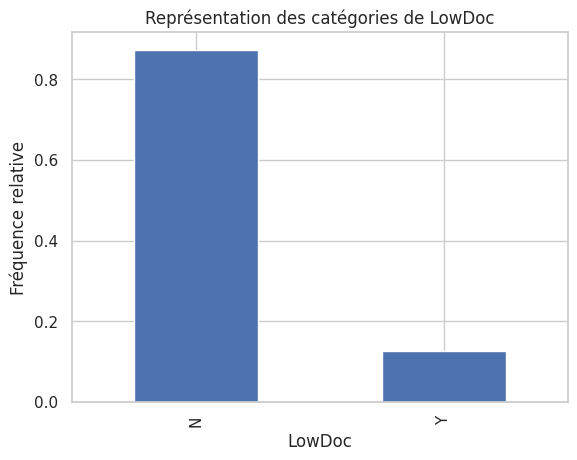

In [194]:
variables = ['RevLineCr', 'LowDoc']

for x in variables:
    df[x].value_counts(normalize=True).plot(kind='bar', width=0.5)
    # plt.xticks(rotation=90)
    plt.title(f'Représentation des catégories de {x}')
    plt.ylabel('Fréquence relative')
    plt.show()



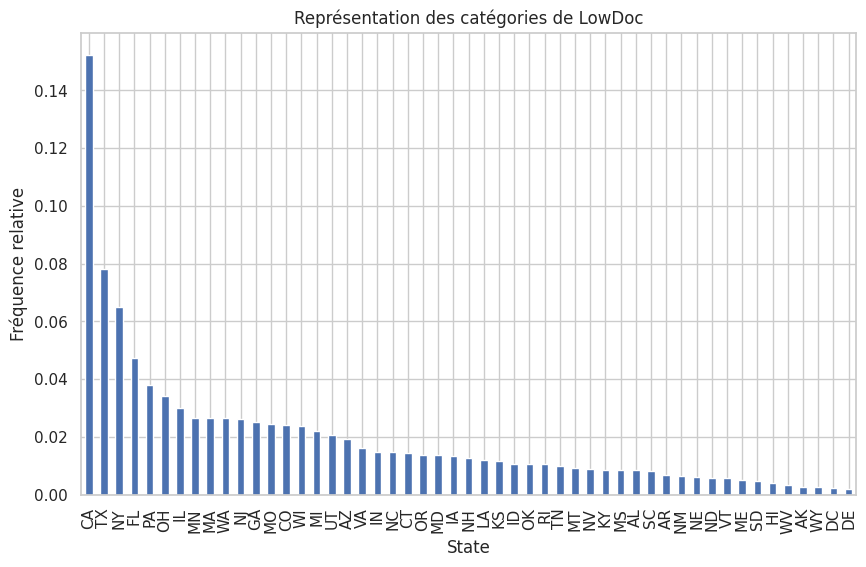

In [195]:
plt.figure(figsize=(10, 6))

    
# Tracer le graphique
df['State'].value_counts(normalize=True).plot(kind='bar', width=0.5)

plt.title(f'Représentation des catégories de {x}')
plt.ylabel('Fréquence relative')
plt.xticks(rotation=90)
plt.show()

In [196]:
df.head(1)

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,IN,451120,1997-02-28,1997-01-01,84,TPE,2.0,0,0,1,0,N,Y,P I F,< 90 000,48000.0
